In [58]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time
import gmaps
from config import g_key

In [3]:
# Create counters.
record_count = 1
set_count = 1

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [7]:
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | mobaye
Processing Record 3 of Set 1 | victoria
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | katsuura
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | komsomolskiy
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | maracaju
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | kyshtovka
Processing Record 17 of Set 1 | payo
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | nieuwpoort
Processing Record 22 of Set 1 | isangel
Processing Record 23 of Set 1 | ushuaia
Processing Record 24 of Set 1 | sept-iles
Processing Record 25 of 

Processing Record 39 of Set 4 | stoyba
City not found. Skipping...
Processing Record 40 of Set 4 | temiscaming
Processing Record 41 of Set 4 | bathsheba
Processing Record 42 of Set 4 | lima
Processing Record 43 of Set 4 | turinsk
Processing Record 44 of Set 4 | yarmouth
Processing Record 45 of Set 4 | bac lieu
Processing Record 46 of Set 4 | tulagi
Processing Record 47 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 48 of Set 4 | rialma
Processing Record 49 of Set 4 | sur
Processing Record 50 of Set 4 | ishigaki
Processing Record 1 of Set 5 | fortuna
Processing Record 2 of Set 5 | severo-kurilsk
Processing Record 3 of Set 5 | bilibino
Processing Record 4 of Set 5 | constitucion
Processing Record 5 of Set 5 | zhuhai
Processing Record 6 of Set 5 | ilulissat
Processing Record 7 of Set 5 | esperance
Processing Record 8 of Set 5 | tilichiki
Processing Record 9 of Set 5 | anshun
Processing Record 10 of Set 5 | kinshasa
Processing Record 11 of Set 5 | burica
City not found. 

Processing Record 32 of Set 8 | chigasaki
Processing Record 33 of Set 8 | ponnani
Processing Record 34 of Set 8 | veinticinco de mayo
Processing Record 35 of Set 8 | clarence town
Processing Record 36 of Set 8 | igarka
Processing Record 37 of Set 8 | verkhnevilyuysk
Processing Record 38 of Set 8 | fairbanks
Processing Record 39 of Set 8 | luderitz
Processing Record 40 of Set 8 | paramonga
Processing Record 41 of Set 8 | kimparana
Processing Record 42 of Set 8 | tawau
Processing Record 43 of Set 8 | tolaga bay
Processing Record 44 of Set 8 | nizhniy kuranakh
Processing Record 45 of Set 8 | galesong
Processing Record 46 of Set 8 | pevek
Processing Record 47 of Set 8 | talaya
Processing Record 48 of Set 8 | totma
Processing Record 49 of Set 8 | othonoi
City not found. Skipping...
Processing Record 50 of Set 8 | bacolod
Processing Record 1 of Set 9 | yerbogachen
Processing Record 2 of Set 9 | nelson bay
Processing Record 3 of Set 9 | muana
Processing Record 4 of Set 9 | hofn
Processing Rec

Processing Record 17 of Set 12 | rolim de moura
City not found. Skipping...
Processing Record 18 of Set 12 | saskylakh
Processing Record 19 of Set 12 | kachug
Processing Record 20 of Set 12 | cervo
Processing Record 21 of Set 12 | alcala la real
Processing Record 22 of Set 12 | nago
Processing Record 23 of Set 12 | henties bay
Processing Record 24 of Set 12 | lamu
Processing Record 25 of Set 12 | balimo
City not found. Skipping...
Processing Record 26 of Set 12 | yagodnoye
Processing Record 27 of Set 12 | teguldet
Processing Record 28 of Set 12 | babu
Processing Record 29 of Set 12 | matane
Processing Record 30 of Set 12 | mahebourg
Processing Record 31 of Set 12 | jiayuguan
Processing Record 32 of Set 12 | dongargaon
Processing Record 33 of Set 12 | san rafael
Processing Record 34 of Set 12 | cockburn town
Processing Record 35 of Set 12 | malanje
Processing Record 36 of Set 12 | sitges
Processing Record 37 of Set 12 | hasaki
Processing Record 38 of Set 12 | santa maria
Processing Reco

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,51.75,77,80,1.01,US,2021-10-18 01:28:50
1,Mobaye,4.3190,21.1786,70.14,98,100,1.10,CF,2021-10-18 01:29:41
2,Victoria,22.2855,114.1577,75.25,71,89,1.01,HK,2021-10-18 01:25:18
3,Kodiak,57.7900,-152.4072,44.11,81,90,31.07,US,2021-10-18 01:29:41
4,Atuona,-9.8000,-139.0333,78.39,71,100,18.48,PF,2021-10-18 01:28:30


In [11]:
# df = df[new_column_order]
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-10-18 01:28:50,42.6001,-73.9662,51.75,77,80,1.01
1,Mobaye,CF,2021-10-18 01:29:41,4.3190,21.1786,70.14,98,100,1.10
2,Victoria,HK,2021-10-18 01:25:18,22.2855,114.1577,75.25,71,89,1.01
3,Kodiak,US,2021-10-18 01:29:41,57.7900,-152.4072,44.11,81,90,31.07
4,Atuona,PF,2021-10-18 01:28:30,-9.8000,-139.0333,78.39,71,100,18.48
...,...,...,...,...,...,...,...,...,...
560,Wembley,AU,2021-10-18 01:32:28,-31.9333,115.8000,71.04,58,40,10.36
561,Shepsi,RU,2021-10-18 01:32:28,44.0361,39.1489,60.35,78,88,3.85
562,Hanna,CA,2021-10-18 01:32:29,51.6334,-111.9018,65.71,36,81,5.01
563,Strangnas,SE,2021-10-18 01:32:29,59.3774,17.0312,39.36,72,0,8.88


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

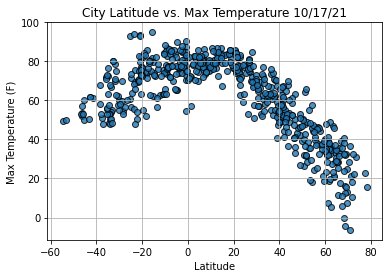

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

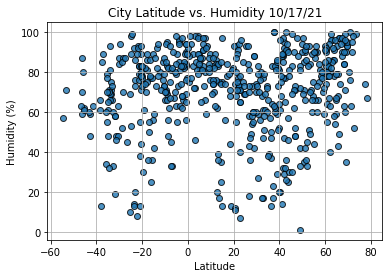

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

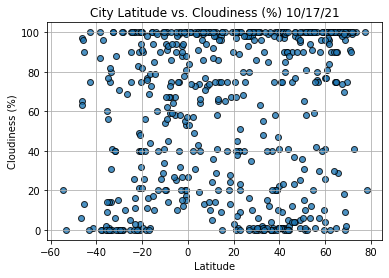

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


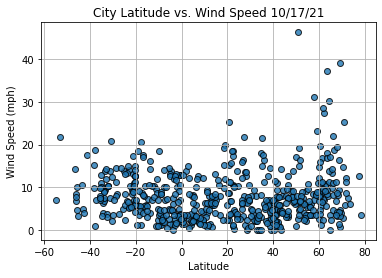

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

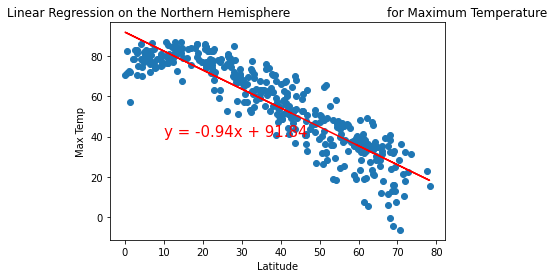

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


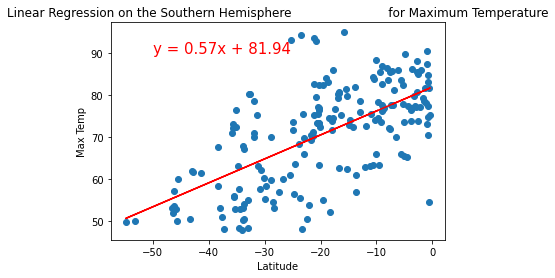

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

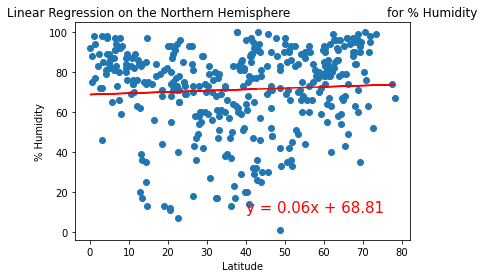

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

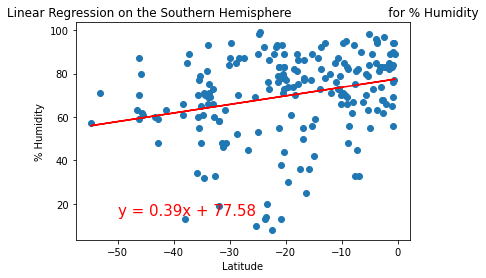

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

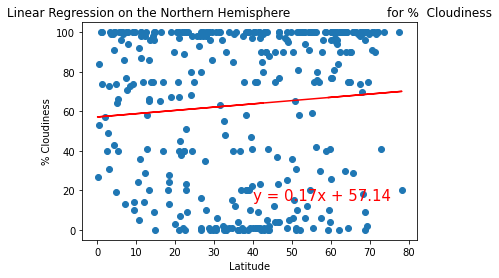

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for %  Cloudiness', '% Cloudiness',(40,15))

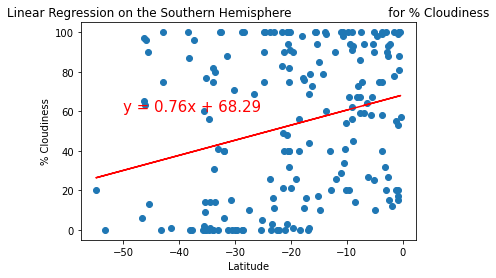

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

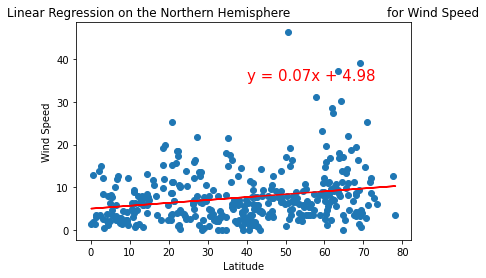

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

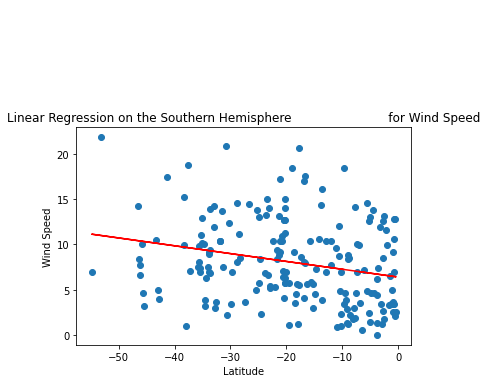

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [28]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Albany,US,2021-10-18 01:28:50,42.6001,-73.9662,51.75,77,80,1.01
1,1,Mobaye,CF,2021-10-18 01:29:41,4.3190,21.1786,70.14,98,100,1.10
2,2,Victoria,HK,2021-10-18 01:25:18,22.2855,114.1577,75.25,71,89,1.01
3,3,Kodiak,US,2021-10-18 01:29:41,57.7900,-152.4072,44.11,81,90,31.07
4,4,Atuona,PF,2021-10-18 01:28:30,-9.8000,-139.0333,78.39,71,100,18.48


In [29]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [32]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [37]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [40]:
# Heatmap of wind speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [42]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,2,Victoria,HK,2021-10-18 01:25:18,22.2855,114.1577,75.25,71,89,1.01
4,4,Atuona,PF,2021-10-18 01:28:30,-9.8000,-139.0333,78.39,71,100,18.48
8,8,Kapaa,US,2021-10-18 01:29:42,22.0752,-159.3190,82.38,77,1,4.00
12,12,Rikitea,PF,2021-10-18 01:29:43,-23.1203,-134.9692,75.58,76,16,13.98
14,14,Butaritari,KI,2021-10-18 01:29:44,3.0707,172.7902,81.70,72,31,12.26
16,16,Payo,ID,2021-10-18 01:29:44,-3.7508,103.6372,76.64,95,99,1.34
19,19,Avarua,CK,2021-10-18 01:29:17,-21.2078,-159.7750,75.25,83,90,9.22
21,21,Isangel,VU,2021-10-18 01:29:46,-19.5500,169.2667,82.51,74,90,5.75
24,24,Port Hedland,AU,2021-10-18 01:29:46,-20.3167,118.5667,82.45,44,32,14.97
25,25,Lorengau,PG,2021-10-18 01:29:47,-2.0226,147.2712,86.05,66,12,9.95


In [43]:
preferred_cities_df.count()

City_ID       179
City          179
Country       179
Date          179
Lat           179
Lng           179
Max Temp      179
Humidity      179
Cloudiness    179
Wind Speed    179
dtype: int64

In [44]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Victoria,HK,75.25,22.2855,114.1577,
4,Atuona,PF,78.39,-9.8000,-139.0333,
8,Kapaa,US,82.38,22.0752,-159.3190,
12,Rikitea,PF,75.58,-23.1203,-134.9692,
14,Butaritari,KI,81.70,3.0707,172.7902,
16,Payo,ID,76.64,-3.7508,103.6372,
19,Avarua,CK,75.25,-21.2078,-159.7750,
21,Isangel,VU,82.51,-19.5500,169.2667,
24,Port Hedland,AU,82.45,-20.3167,118.5667,
25,Lorengau,PG,86.05,-2.0226,147.2712,


In [45]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [46]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'Aap_uECURZFFy1xQvC89yywNgTODGoWjS2Zs05TyGe2zWpI15zQiybXS-FDAf-cbM-ywmPBnX1t_c5Lg-GeBRZ7e9aJJyHy_MXjQnbOwkdiuC6fSjhYeKwAQ8AZQkl4DggFSmeMaOt1BtroHDua4yJAxKxx9gYzgTPFBbJqide6NRKZRtX6CbESuzRnvBbmIT9QdDdHKviCX7COBxJh3xLpIGhVWNmbQQePXzpmLyl3i07780CocOCZ51Ni3HqClhWjK43eZV60aN0srCDbET8rXSK8Y5TTCUr3OYnnTegugJrdz25PZsFR4UHZzPIvpPp6FSGrrGPcJgJP7a6NPq3ZVYcSJ03D5Y04SJjtnQcmJ0cMU0prjWMXcMe8C25S3qG1EUllEmuPHIKR4QWcPpWNX8RDv_3kX1GSOtvFqvh-RiSp6-tz8XTJ9n7Fl',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594360302915,
      'lng': 2.354355480291502},
     'southwest': {'lat': 48.8567380697085, 'lng': 2.351657519708498}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'icon_background_color': '#909CE1',
   'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/hotel_pinlet',
   'nam

In [51]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")


Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [52]:
hotel_df

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Victoria,HK,75.25,22.2855,114.1577,Mini Hotel Central
4,Atuona,PF,78.39,-9.8000,-139.0333,Villa Enata
8,Kapaa,US,82.38,22.0752,-159.3190,Sheraton Kauai Coconut Beach Resort
12,Rikitea,PF,75.58,-23.1203,-134.9692,People ThankYou
14,Butaritari,KI,81.70,3.0707,172.7902,Isles Sunset Lodge
...,...,...,...,...,...,...
553,Ruteng,ID,77.00,-8.6136,120.4721,Hotel FX 72
556,Manaus,BR,77.49,-3.1019,-60.0250,Manaus Hotéis Millennium
558,Mocuba,MZ,80.22,-16.8392,36.9856,Phama Lodge
559,Santa Isabel Do Rio Negro,BR,75.15,-0.4139,-65.0192,Hotel GSA


In [1]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

NameError: name 'hotel_df' is not defined

In [55]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]


In [56]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))